<h1 style="font-family: 'Computer Modern Serif', serif;">Searching algorithms</h1>

<a href="./assets/Searching%20algorithms.ipynb" download><img src="https://img.shields.io/badge/Jupyter%20Notebook-Download-%23F37626?style=for-the-badge&logo=jupyter"></a>

<h6 style="font-family: 'Computer Modern Serif', serif; font-size: large;"><a href="https://en.wikipedia.org/wiki/Search_algorithm" target="_blank">Wiki: Searching algorithms</a></h6>

<link rel="stylesheet" type="text/css" href="https://cdn.jsdelivr.net/gh/aaaakshat/cm-web-fonts@latest/fonts.css">

<div style="font-family: 'Computer Modern Serif', serif;">
<h2><a id="content">Table of content</a></h2>
<ol style="font-size: large;">
    <li><a href="#linear_search">Linear search</a></li>
    <li><a href="#binary_search">Binary search</a></li>
    <li><a href="#jump_search">Jump search</a></li>
</ol>
</div>

<h2 style="font-family: 'Computer Modern Serif', serif;">Modules</h2>

In [1]:
import random
import time
import numpy as np
from typing import List, Tuple, Callable

import matplotlib.pyplot as plt

plt.style.use(["science", "grid"])

<h2 style="font-family: 'Computer Modern Serif', serif;">Setup</h2>

<span style="font-family: 'Computer Modern Serif', serif; font-size: large;"><b>Setup test data flow</b></span>

In [2]:
def setup_data(n: int) -> Tuple[List[int], int]:
    array = [random.randint(-10**9, 10**9) for _ in range(n)]
    value = array[-1]
    return array, value

<span style="font-family: 'Computer Modern Serif', serif; font-size: large;"><b>Calculate execution time</b></span>

In [3]:
def timeit(n: int, func: Callable) -> float:
    array, value = setup_data(n)
    start = time.time()
    func(array, value)
    end = time.time()
    return end - start

In [4]:
def draw_plot(*, start: int, stop: int, step: int, func: Callable, polydeg: int = 10) -> None:
    x = [n for n in range((stop-start)//step)]
    y = [timeit(n, func) for n in range(start, stop, step)]
    plt.title(func.__name__)
    plt.rcParams["figure.figsize"] = (7,6)
    plt.rcParams.update({"font.size": 17})
    plt.xlabel("Iteration", fontsize=15)
    plt.ylabel("Time", fontsize=15)
    z = np.polyfit(x, y, polydeg)
    p = np.poly1d(z)
    plt.plot(x, p(x), "m--", linewidth=1.5, label="Approximation")
    plt.plot(y, linewidth=2.0, label="Values")
    plt.legend(loc="upper left", frameon=False)
    plt.show()

<span style="font-family: 'Computer Modern Serif', serif; font-size: large;"><b>Functions for testing</b></span>

In [5]:
def true_index(array: List[int], value: int) -> int:
    try:
        return array.index(value)
    except ValueError:
        return -1

In [6]:
def test_algo(array: List[int], value: int, *, func: Callable) -> None:
    assert func(array, value) == true_index(array, value), "Wrong Answer (WA)"

<h2 style="font-family: 'Computer Modern Serif', serif;">Algorithms</h2>

<h3 style="font-family: 'Computer Modern Serif', serif;"><a id="linear_search" href="#content">Linear search</a> (Последовательный поиск)</h3>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Описание</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Пусть задан список $[a_1, a_2, \dots, a_n]$ длины $n$. Нужно найти номер $k$, такое что $a_k = value$, где $value$ искомое значение в списке. Алгоритм состоит в том, что мы последовательно смотрит на каждый элемент $a_i \hspace{0.2cm} \forall i \in \{1, \dots, n\}$ и сравниваем его с $value$, как только у нас произошло совпадение, то возвращаем номер $i$. Если элемента нет в списке, то возвращаем $-1$.
</div>

$Time \ Complexity: O(n)$

$Space \ Complexity: O(1)$

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Пример</h4>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">Исходный список:

$$ array = [Eren, Mikasa, Levi, Sasha, Armin] $$
$$ target \ value = Sasha $$
</div>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">

$i = 0$:
$$Eren == Sasha \longrightarrow false$$
$$[\fbox{Eren}, Mikasa, Levi, Sasha, Armin]$$
$i = 1:$
$$Mikasa == Sasha \longrightarrow false$$
$$[Eren, \fbox{Mikasa}, Levi, Sasha, Armin]$$
$i = 2:$
$$Mikasa == Sasha \longrightarrow false$$
$$[Eren, Mikasa, \fbox{Levi}, Sasha, Armin]$$
$i = 3:$
$$Sasha == Sasha \longrightarrow true$$
$$[Eren, Mikasa, Levi, \fbox{Sasha}, Armin]$$

Результат:
$$3$$
</div>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Реализация</h4>

In [7]:
def linear_search(array: List[int], value: int) -> int:
    n = len(array)
    for i in range(n):
        if array[i] == value:
            return i
    return -1

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Тест</h4>

In [8]:
test_algo(["Eren", "Mikasa", "Levi", "Sasha", "Armin"], "Sasha", func=linear_search)

In [9]:
test_algo(["Eren", "Mikasa", "Levi", "Sasha", "Armin"], "", func=linear_search)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">График асимптотики</h4>

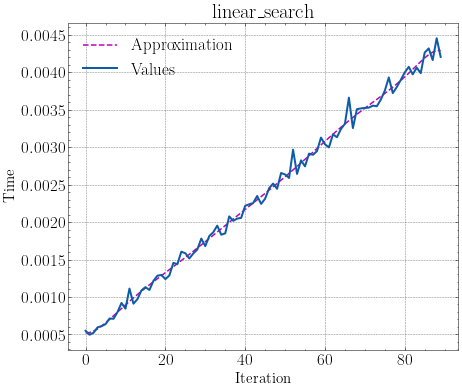

In [20]:
draw_plot(start=1000, stop=10000, step=100, func=linear_search)

<h3 style="font-family: 'Computer Modern Serif', serif;"><a id="binary_search" href="#content">Binary search</a> (Двоичный поиск)</h3>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Описание</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Пусть дан <u>отсортированный по возрастанию</u> список $[a_1, a_2, \dots, a_n]$. Алгоритм состоит в том, что мы берём элемент из середины списка $-$ $a_{div(n,2)}$ и сравниваем его с $target \ value$, если $a_{div(n,2)} > target \ value$, то рассматриваем правую часть списка, в противном случае рассматриваем левую часть списка. Проделываем данный алгоритм до тех пор пока центральный элемент не является $target \ value$.
</div>

$Time \ Complexity: O(\log(n))$

$Space \ Complexity: O(1)$

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Пример</h4>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">Исходный список:

$$ array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] $$
$$ target \ value = 10 $$
</div>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">

$i = 0$:
$$[\fbox{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]$$
$$mid = div[0+9, 2] = 4 \longrightarrow array[4] = 5$$
$$5 < 10 \longrightarrow true$$
$$[1, 2, 3, 4, 5, \fbox{6, 7, 8, 9, 10}]$$
$i = 1:$
$$[1, 2, 3, 4, 5, \fbox{6, 7, 8, 9, 10}]$$
$$mid = div[5+9, 2] = 7 \longrightarrow array[7] = 8$$
$$8 < 10 \longrightarrow true$$
$$[1, 2, 3, 4, 5, 6, 7, 8, \fbox{9, 10}]$$
$i = 2:$
$$[1, 2, 3, 4, 5, 6, 7, 8, \fbox{9, 10}]$$
$$mid = div[8+9, 2] = 8 \longrightarrow array[8] = 9$$
$$9 < 10 \longrightarrow true$$
$$[1, 2, 3, 4, 5, 6, 7, 8, 9, \fbox{10}]$$
$i = 3:$
$$[1, 2, 3, 4, 5, 6, 7, 8, 9, \fbox{10}]$$
$$mid = div[9+9, 2] = 9 \longrightarrow array[9] = 10$$
$$10 == 10 \longrightarrow true$$

Результат:
$$9$$
</div>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Реализация</h4>

In [11]:
def binary_search(array: List[int], value: int) -> int:
    low = 0
    high = len(array)-1

    while low <= high:
        mid = (low + high)//2
        guess = array[mid]
        if guess == value:
            return mid
        if guess > value:
            high = mid - 1
        else:
            low = mid + 1
    return -1

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Тест</h4>

In [12]:
test_algo(list(range(1,101)), 100, func=binary_search)

In [13]:
test_algo(list(range(1,101)), 102, func=binary_search)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">График асимптотики</h4>

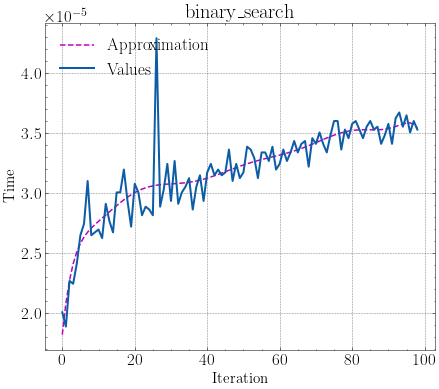

In [19]:
draw_plot(start=100, stop=10000, step=100, func=binary_search)

<h3 style="font-family: 'Computer Modern Serif', serif;"><a id="jump_search" href="#content">Jump search</a></h3>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Описание</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Пусть дан <u>отсортированный по возрастанию</u> список $[a_1, a_2, \dots, a_n]$. Алгоритм состоит в том, что мы разбиваем исходный массив на блоки с шагом $m$: $[a_1, a_m, a_{2m}, \dots, a_{km}]$, затем мы находим в каком из блоков (интервалов) лежит $target \ value$: $a_{jm} \leq target \ value \leq a_{(j+1)m}$. Дальше мы просто пробегаемся линейным поиском по этому блоку и находим номер в массиве, который соответствует $target \ value$.<br>
В качестве $m$ оптимально брать $m = \sqrt{n}$.
</div>

$Time \ Complexity: O(\sqrt{n})$

$Space \ Complexity: O(1)$

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Пример</h4>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">Исходный список:

$$ array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] $$
$$ target \ value = 6 $$
$$ m = \sqrt{10} \approx 3$$
</div>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">

1 шаг:
$$[\fbox{1, 2, 3}, 4, 5, 6, 7, 8, 9, 10]$$
$$3 < 6 \longrightarrow true$$

2 шаг:
$$[1, 2, 3, \fbox{4, 5, 6}, 7, 8, 9, 10]$$
$$6 == 6 \longrightarrow true$$
    
Нашли нужное окно, применяем линейный поиск.<br>
    
3 шаг:
$$[1, 2, 3, \fbox{4}, 5, 6, 7, 8, 9, 10]$$
$$4 == 6 \longrightarrow false$$

4 шаг:
$$[1, 2, 3, 4, \fbox{5}, 6, 7, 8, 9, 10]$$
$$5 == 6 \longrightarrow false$$
    
5 шаг:
$$[1, 2, 3, 4, 5, \fbox{6}, 7, 8, 9, 10]$$
$$6 == 6 \longrightarrow true$$
    
Результат:
$$5$$
</div>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Реализация</h4>

In [15]:
def jump_search(array: List[int], value: int) -> int:
    n = len(array)
    step = np.sqrt(n)    # Block size

    # Finding the block where element is presented
    prev = 0
    while array[int(min(step, n) - 1)] < value:
        prev = step
        step += np.sqrt(n)
        if prev >= n:
            return -1

    # Linear search throught block
    while array[int(prev)] < value:
        prev += 1
        # If reached next block or end of array, element is not presented
        if prev == min(step, n):
            return -1

    if array[int(prev)] == value:
        return prev
    
    return -1

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Тест</h4>

In [16]:
test_algo(list(range(1,101)), 100, func=jump_search)

In [17]:
test_algo(list(range(1,101)), 102, func=jump_search)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">График асимптотики</h4>

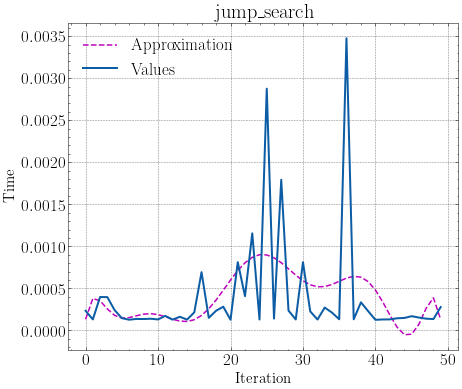

In [25]:
draw_plot(start=5000, stop=10000, step=100, func=jump_search)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold; text-align: center;"><a href="../index.html">⟵ Back</a></h4>